# 05\. OSEMN

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [5]:
random_list = np.random.randint(0, 1000, (100))
np.savetxt('simple_data.txt', random_list, fmt='%d')

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [8]:
matrix = np.random.rand(5, 5)
np.savetxt('data.txt', matrix)

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [37]:
with open('data.csv', 'w') as csv_file:
    with open('data.txt', 'r') as data_file:
        for line in data_file:
            values = line.split() 
            csv_file.write(', '.join(values) + '\n')

### 4\. Credit card (20 min)
Load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding.

**hint**: use the `chr()` function to convert a number to a char

In [40]:
credit_card_numbers = []

with open('credit_card.dat', 'rb') as file:
    for num, line in enumerate(file):
        reversed_line = line[:-1]
        if(len(reversed_line)!=4):
            current_credit_card = []
            
            for i in range(int((len(reversed_line) - 4) / 6)):
                six_digits = reversed_line[i * 6: (i + 1) * 6]
                decimal_number = int(six_digits, 2)
                character = chr(decimal_number)
                current_credit_card.append(character)
            
            credit_card_numbers.append(''.join(current_credit_card))

for i, credit_card_number in enumerate(credit_card_numbers, start=1):
    print(f"Credit Card {i}: {credit_card_number}")

Credit Card 1: 7648 5673 3775 2271
Credit Card 2: 3257 8247 3354 2266
Credit Card 3: 2722 0001 4011 6652
Credit Card 4: 0661 3063 3742 3150
Credit Card 5: 0432 1608 1462 4742
Credit Card 6: 5827 2027 8785 7303
Credit Card 7: 5774 8528 2087 1117
Credit Card 8: 8140 1210 6352 2845
Credit Card 9: 5764 1133 7301 7100
Credit Card 10: 6456 1737 4126 6726
Credit Card 11: 1228 8631 7382 0000
Credit Card 12: 7051 0160 5374 3166
Credit Card 13: 0618 3587 1630 6376
Credit Card 14: 1545 5454 7444 5636
Credit Card 15: 6735 3116 3202 6834
Credit Card 16: 7287 5011 1547 8413
Credit Card 17: 7033 2607 3328 4200
Credit Card 18: 2568 5244 1874 5024
Credit Card 19: 1684 2253 7570 7118
Credit Card 20: 0672 2576 0575 6631
Credit Card 21: 6332 8353 8787 1340
Credit Card 22: 1813 3361 1175 4211
Credit Card 23: 2477 6450 8840 2368
Credit Card 24: 5512 3505 2563 1326
Credit Card 25: 3083 7882 0621 0025
Credit Card 26: 4521 5148 8045 0334
Credit Card 27: 7563 3654 8713 5787
Credit Card 28: 8324 2664 0476 5561
C

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [48]:
import json, csv

user_data = json.load(open('user_data.json', 'r'))
american_express = [user for user in user_data if user.get('CreditCardType') == 'American Express']

with open('american_express.csv', 'w', newline='') as csv_file:
    fieldnames = american_express[0].keys() if american_express else [] 
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerows(american_express)

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


(array([4208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3916.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

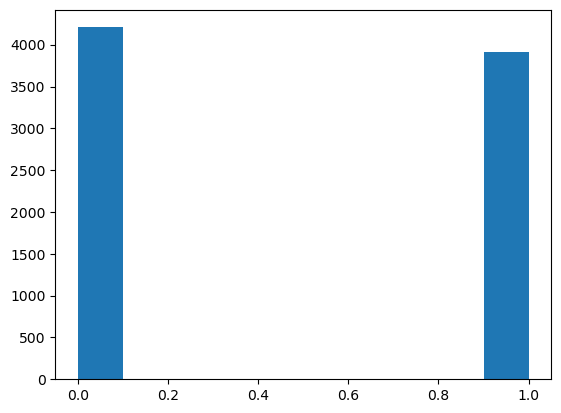

In [52]:
import matplotlib.pyplot as plt

file = pd.read_csv('https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1')
plt.hist(file['class'])

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

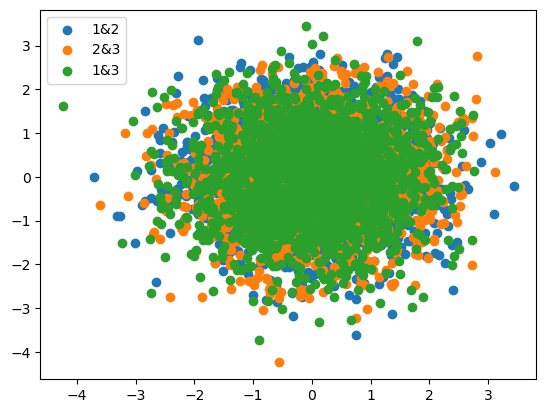

In [57]:
file = pd.read_csv('https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1')

plt.scatter(file['features_1'], file['features_2'], label='1&2')
plt.scatter(file['features_2'], file['features_3'], label='2&3')
plt.scatter(file['features_3'], file['features_1'], label='1&3')

plt.legend()
plt.show()

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [59]:
file = pd.read_csv('https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1')

file.to_json('data.json')